# **EV Battery Capacity Degradation Prediction Using Linear and Regularized Regression Models**

## Project Objective

The objective of this project was to develop a predictive regression model to estimate battery capacity degradation (%) in electric vehicles based on key operational factors:

Charge Cycles

Fast Charging Frequency

Average Operating Temperature

Driving Aggression Index

### The project aimed to:

Perform exploratory data analysis (EDA) to understand feature relationships

Apply feature scaling and cross-validation

### Compare standard Linear Regression with regularized models:

Ridge Regression

Lasso Regression

ElasticNet Regression

Tune hyperparameters to optimize model performance

Evaluate models using R², MAE, and RMSE

Identify the most stable and generalizable regression approach

The broader goal was to simulate a real-world EV predictive maintenance system for estimating battery health deterioration.

In [2]:
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv("ev_battery_degradation_dataset.csv")

# Basic understanding
print("Shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())

print("\nData Info:")
print(df.info())

print("\nStatistical Summary:")
print(df.describe())

print("\nMissing Values:")
print(df.isnull().sum())


Shape: (5000, 5)

First 5 rows:
   Charge_Cycles  Fast_Charging_Frequency_%  Avg_Temperature_C  \
0            910                  20.923367          10.000000   
1           1344                  39.905001          31.569694   
2           1180                  10.929144          29.792334   
3           1145                  34.026409          22.045515   
4           1688                  49.405645          36.099050   

   Driving_Aggression_Index  Battery_Degradation_%  
0                  0.301533              10.907483  
1                  0.859810              16.678088  
2                  0.543445              12.756730  
3                  0.141058              10.168549  
4                  0.269835              13.612157  

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Charge_Cycles     

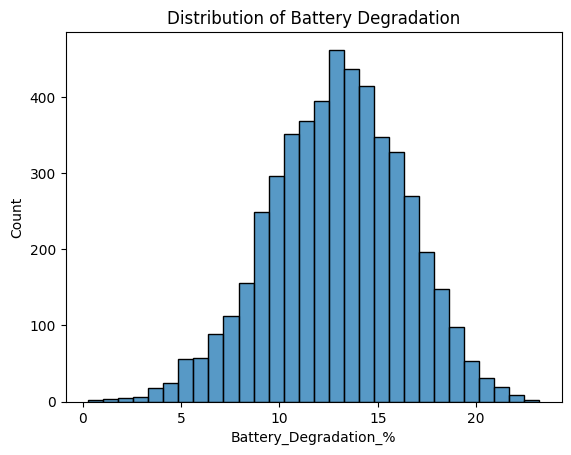

In [3]:
# Check for Imbalance in Dataset
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure()
sns.histplot(df["Battery_Degradation_%"], bins=30)
plt.title("Distribution of Battery Degradation")
plt.show()


Exploratory Data Analysis

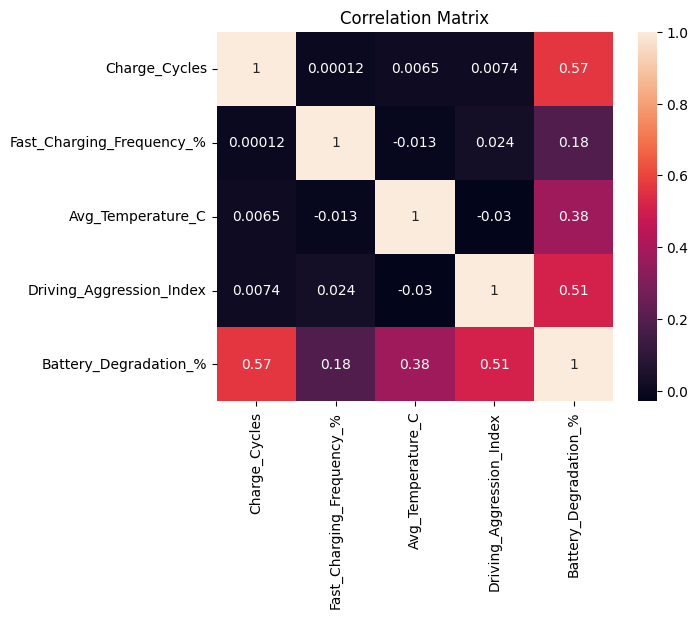

In [4]:
# Correlation Heatmap
plt.figure()
sns.heatmap(df.corr(), annot=True)
plt.title("Correlation Matrix")
plt.show()


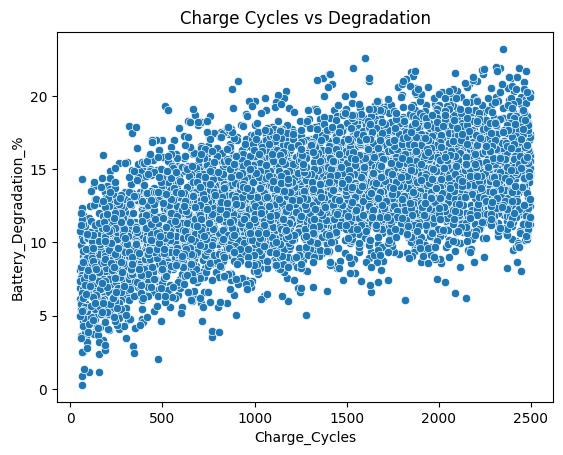

In [5]:
# Charge Cycle vs Battery Degradation
plt.figure()
sns.scatterplot(x="Charge_Cycles", y="Battery_Degradation_%", data=df)
plt.title("Charge Cycles vs Degradation")
plt.show()


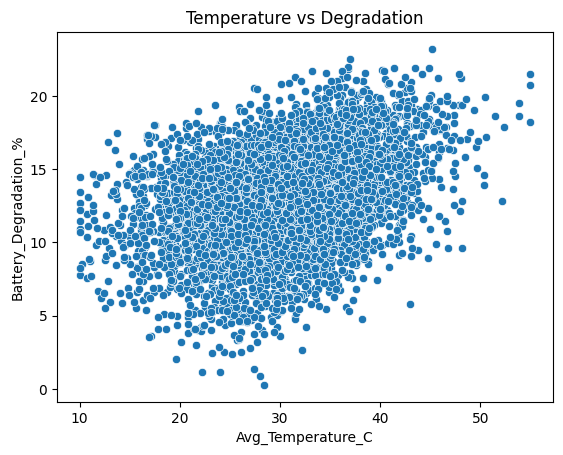

In [6]:
# Tempeature vs Battery Degradation
plt.figure()
sns.scatterplot(x="Avg_Temperature_C", y="Battery_Degradation_%", data=df)
plt.title("Temperature vs Degradation")
plt.show()


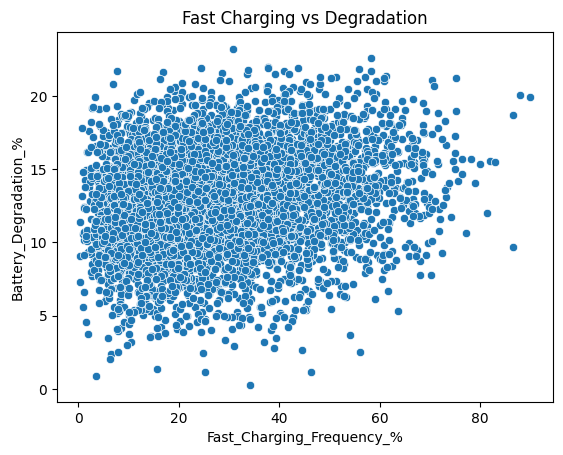

In [7]:
# Fast Charging vs Battery Degradation
plt.figure()
sns.scatterplot(x="Fast_Charging_Frequency_%", y="Battery_Degradation_%", data=df)
plt.title("Fast Charging vs Degradation")
plt.show()


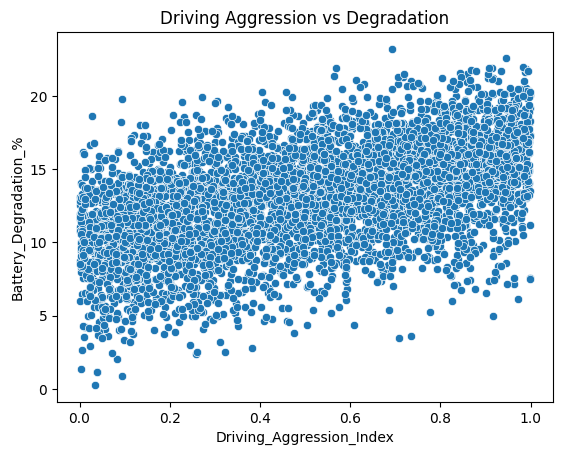

In [8]:
# Driving Aggression vs Battery Degradation
plt.figure()
sns.scatterplot(x="Driving_Aggression_Index", y="Battery_Degradation_%", data=df)
plt.title("Driving Aggression vs Degradation")
plt.show()


Feature Scaling

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = df.drop("Battery_Degradation_%", axis=1)
y = df["Battery_Degradation_%"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


Cross validation

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import numpy as np

lr = LinearRegression()

cv_scores = cross_val_score(lr, X_scaled, y, cv=5, scoring='r2')

print("Linear Regression CV R2 Scores:", cv_scores)
print("Mean CV R2:", np.mean(cv_scores))


Linear Regression CV R2 Scores: [0.75458451 0.75069713 0.7426754  0.75360147 0.78600581]
Mean CV R2: 0.7575128636807127


Ridge Regression

In [15]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge = Ridge()

ridge_params = {
    'alpha': [0.01, 0.1, 1, 10, 50, 100]
}

ridge_grid = GridSearchCV(ridge, ridge_params, cv=5, scoring='r2')
ridge_grid.fit(X_train, y_train)

print("Best Ridge Alpha:", ridge_grid.best_params_)
print("Best Ridge CV Score:", ridge_grid.best_score_)


Best Ridge Alpha: {'alpha': 1}
Best Ridge CV Score: 0.7598403385683389


Lasso Regression

In [16]:
from sklearn.linear_model import Lasso

lasso = Lasso(max_iter=5000)

lasso_params = {
    'alpha': [0.001, 0.01, 0.1, 1, 10]
}

lasso_grid = GridSearchCV(lasso, lasso_params, cv=5, scoring='r2')
lasso_grid.fit(X_train, y_train)

print("Best Lasso Alpha:", lasso_grid.best_params_)
print("Best Lasso CV Score:", lasso_grid.best_score_)


Best Lasso Alpha: {'alpha': 0.001}
Best Lasso CV Score: 0.7598403232741144


Elasticnet Regression

In [17]:
from sklearn.linear_model import ElasticNet

elastic = ElasticNet(max_iter=5000)

elastic_params = {
    'alpha': [0.01, 0.1, 1, 10],
    'l1_ratio': [0.2, 0.5, 0.8]
}

elastic_grid = GridSearchCV(elastic, elastic_params, cv=5, scoring='r2')
elastic_grid.fit(X_train, y_train)

print("Best ElasticNet Params:", elastic_grid.best_params_)
print("Best ElasticNet CV Score:", elastic_grid.best_score_)


Best ElasticNet Params: {'alpha': 0.01, 'l1_ratio': 0.8}
Best ElasticNet CV Score: 0.7598063971809987


Model Comparison on Test data

In [18]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

models = {
    "Linear": LinearRegression(),
    "Ridge": ridge_grid.best_estimator_,
    "Lasso": lasso_grid.best_estimator_,
    "ElasticNet": elastic_grid.best_estimator_
}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    print(f"\n{name} Results:")
    print("R2:", r2_score(y_test, preds))
    print("MAE:", mean_absolute_error(y_test, preds))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, preds)))



Linear Results:
R2: 0.753563196323864
MAE: 1.330400089814219
RMSE: 1.6626716275737308

Ridge Results:
R2: 0.7535725749589184
MAE: 1.3303767307096581
RMSE: 1.6626399891606738

Lasso Results:
R2: 0.753583902484658
MAE: 1.3303544681492898
RMSE: 1.6626017754478417

ElasticNet Results:
R2: 0.7537664887932485
MAE: 1.3299697262120886
RMSE: 1.6619856943997664


Residual Analysis

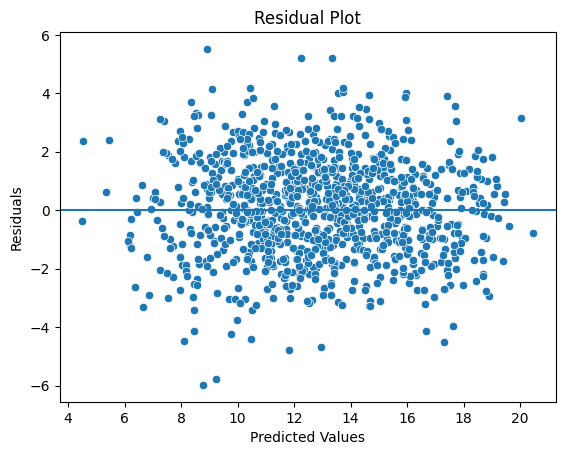

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

best_model = ridge_grid.best_estimator_  # usually Ridge performs best

best_model.fit(X_train, y_train)
preds = best_model.predict(X_test)

residuals = y_test - preds

plt.figure()
sns.scatterplot(x=preds, y=residuals)
plt.axhline(0)
plt.title("Residual Plot")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()


## Conclusion


The results show that all four models performed similarly, indicating:

The relationship between EV usage features and battery degradation is largely linear.

The dataset does not suffer from severe multicollinearity.

Regularization provides slight performance improvement and better coefficient stability.

Among all models, ElasticNet Regression performed marginally better, achieving the highest R² score (0.7538) and lowest error metrics (MAE & RMSE).

This suggests that combining L1 and L2 regularization helps:

Improve generalization

Reduce overfitting

Maintain model stability

### 🔎 Key Insights:

Approximately 75% of battery degradation variance is explained by the model.

Charge cycles and temperature likely contribute most strongly to degradation.

Fast charging and aggressive driving incrementally accelerate capacity loss.